In [203]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [204]:
df = pd.read_csv("C:/Users/aabhi/Downloads/HR_comma_sep (1).csv")

In [205]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'department', 'salary', 'left'],
      dtype='object')

In [206]:
df.shape

(14999, 10)

In [207]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
promotion_last_5years      int64
department                object
salary                    object
left                       int64
dtype: object

In [208]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268,0.238083
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281,0.425924
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   promotion_last_5years  14999 non-null  int64  
 7   department             14999 non-null  object 
 8   salary                 14999 non-null  object 
 9   left                   14999 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [210]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


In [211]:
df.left.value_counts(normalize=True).round(2)*100

0    76.0
1    24.0
Name: left, dtype: float64

In [212]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
department               0
salary                   0
left                     0
dtype: int64

In [213]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [214]:
missing_values_table(df)

Your selected dataframe has 10 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [215]:
def count_values_table(df):
        count_val = df.value_counts()
        count_val_percent = 100 * df.value_counts() / len(df)
        count_val_table = pd.concat([count_val, count_val_percent.round(1)], axis=1)
        count_val_table_ren_columns = count_val_table.rename(
        columns = {0 : 'Count Values', 1 : '% of Total Values'})
        return count_val_table_ren_columns

In [216]:
count_values_table(df['number_project'])

,number_project,number_project
4,4365,29.1
3,4055,27.0
5,2761,18.4
2,2388,15.9
6,1174,7.8
7,256,1.7


The average empoloyee in this data set takes on 3-4 projects 

In [217]:
count_values_table(df['department'])

,department,department
sales,4140,27.6
technical,2720,18.1
support,2229,14.9
IT,1227,8.2
product_mng,902,6.0
marketing,858,5.7
RandD,787,5.2
accounting,767,5.1
hr,739,4.9
management,630,4.2


Most of the hires for this company worked in sales and technical support roles

In [218]:
count_values_table(df['Work_accident'])

,Work_accident,Work_accident
0,12830,85.5
1,2169,14.5


In [219]:
count_values_table(df['last_evaluation'])

,last_evaluation,last_evaluation
0.55,358,2.4
0.50,353,2.4
0.54,350,2.3
0.51,345,2.3
0.57,333,2.2
...,...,...
0.39,52,0.3
0.43,50,0.3
0.38,50,0.3
0.44,44,0.3


In [220]:
def hist_chart(df, col):
        plt.style.use('fivethirtyeight')
        plt.hist(df[col].dropna(), edgecolor = 'k');
        plt.xlabel(col); plt.ylabel('Number of Entries'); 
        plt.title('Distribution of '+col);

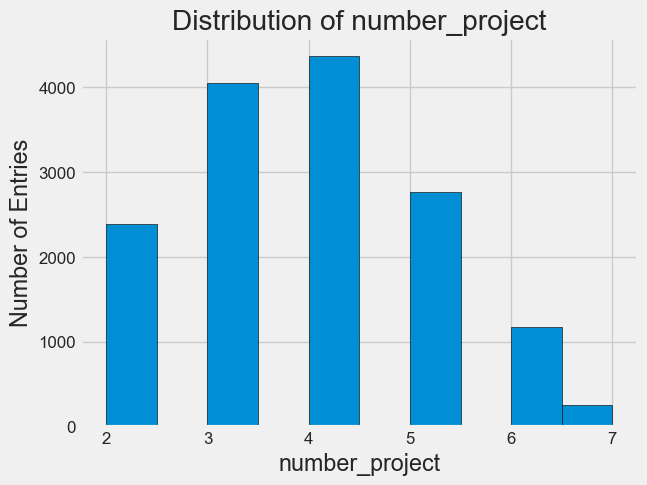

In [221]:
hist_chart(df, 'number_project')

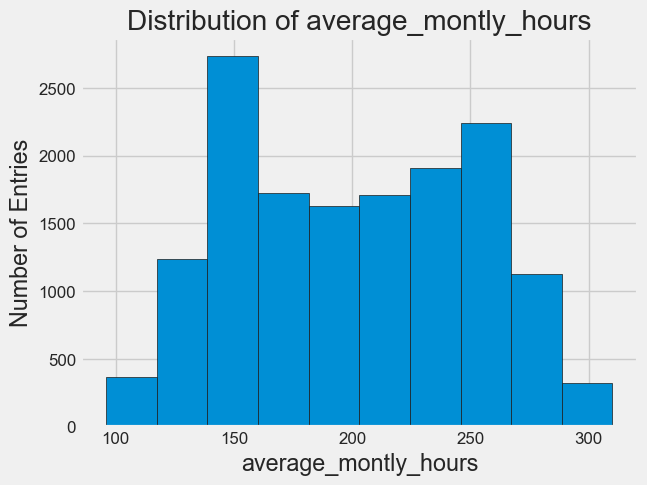

In [222]:
hist_chart(df, 'average_montly_hours')

Majority of the date is around 150-250 hours worked for the average employee

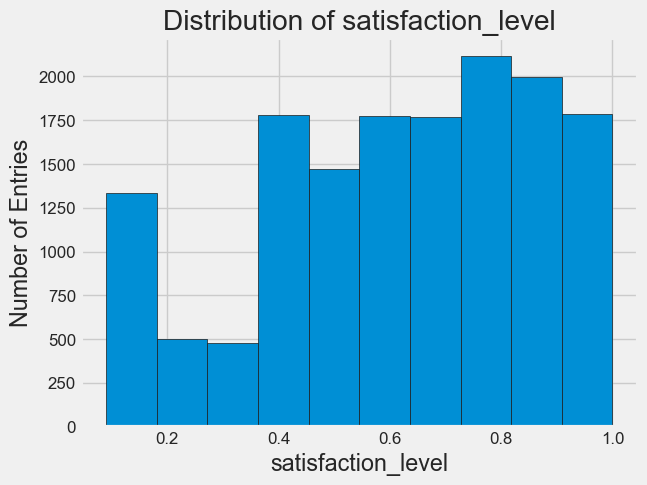

In [223]:
hist_chart(df, 'satisfaction_level')

Most of the employees have a mid to high satisfaction level in the work they are doing 

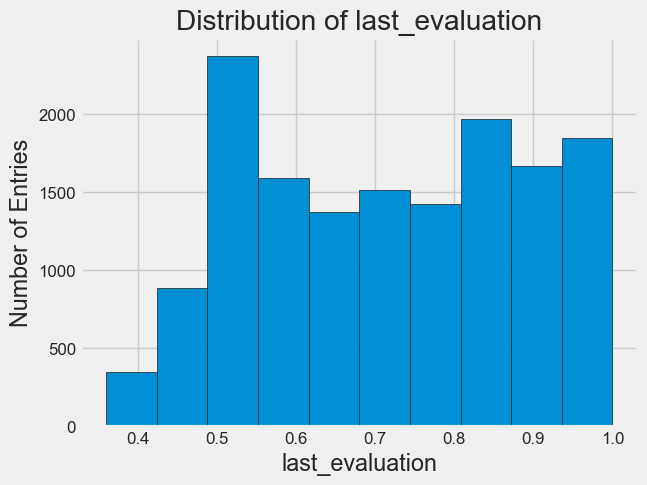

In [224]:
hist_chart(df, 'last_evaluation')

A large amount of people hover around the 0.5 mark but majority of the data is from 0.5-1.0 with very few being below 0.5.

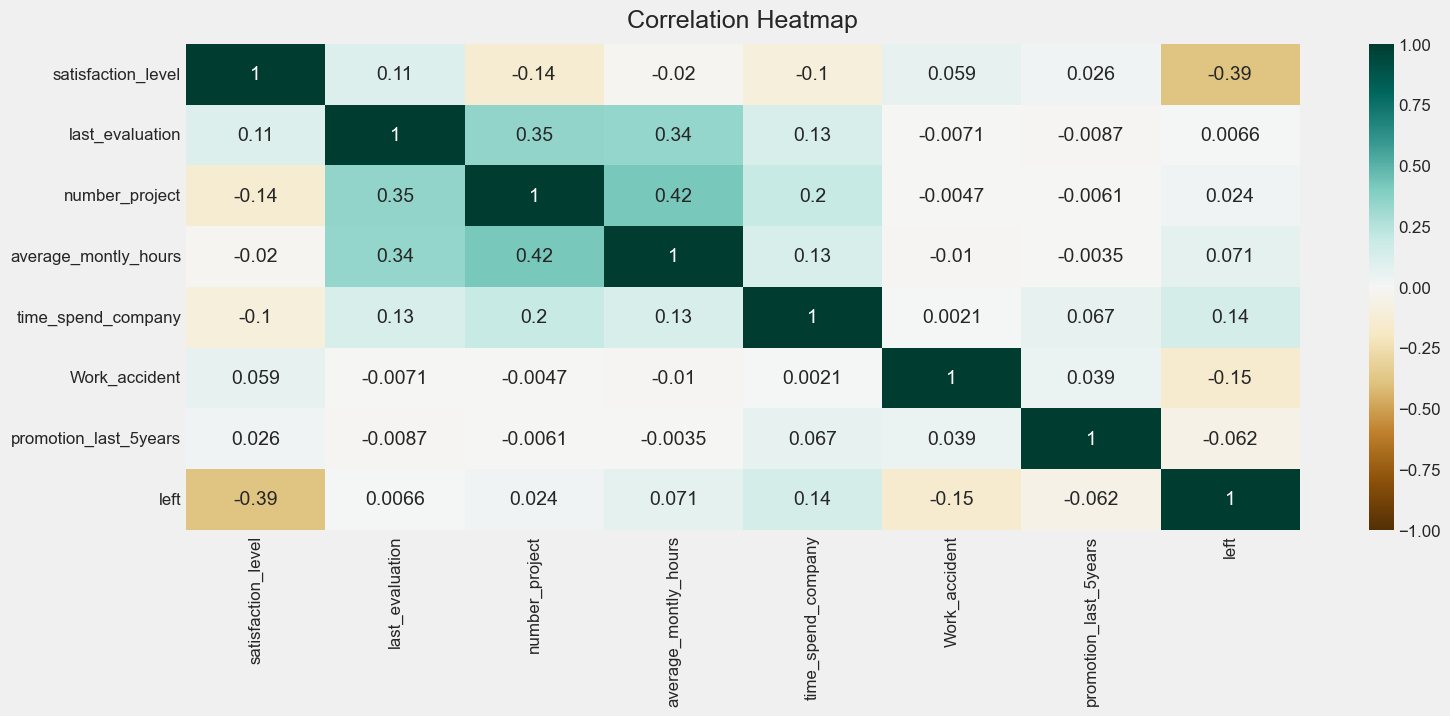

In [225]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

In [226]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [227]:
# observations on the group by table 

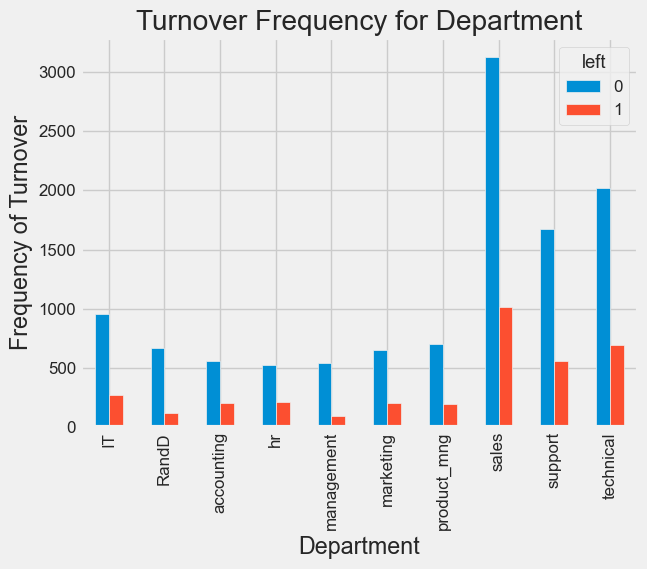

In [228]:
pd.crosstab(df.department, df.left).plot(kind="bar")
plt.title("Turnover Frequency for Department")
plt.xlabel("Department")
plt.ylabel("Frequency of Turnover")
plt.show()

In [229]:
from sklearn.model_selection import train_test_split
X = df.drop('left', axis=1)
y = df['left']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [230]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks

In [231]:
df.department.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [232]:
X_train = pd.get_dummies(X_train)

In [233]:
X_test = pd.get_dummies(X_test)

In [234]:
X_train.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
9838,1.00,0.61,3,188,4,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
7689,0.16,0.78,4,196,5,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
6557,0.80,0.80,3,175,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
6872,0.66,0.86,4,112,6,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
820,0.11,0.93,7,284,4,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [235]:
balData = SMOTE()
X_train,y_train = balData.fit_resample(X_train,y_train)

(array([9134.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        9134.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

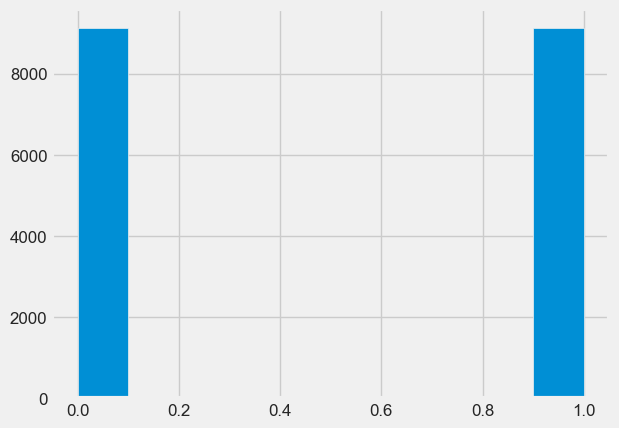

In [236]:
plt.hist(y_train)

In [237]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_predh = rf.predict(X_test)
print(classification_report(y_test,y_predh))

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)

scores = cross_val_score(rf, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2294
           1       0.97      0.96      0.97       706

    accuracy                           0.98      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.98      0.98      0.98      3000

Mean ROC AUC: 0.998


In [238]:
from lightgbm import LGBMClassifier
model = LGBMClassifier()
model.fit(X_train,y_train)
y_predh = rf.predict(X_test)
print(classification_report(y_test,y_predh))

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)

scores = cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2294
           1       0.97      0.96      0.97       706

    accuracy                           0.98      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.98      0.98      0.98      3000

Mean ROC AUC: 0.998


In [239]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(max_iter=100000)
log.fit(X_train,y_train)
y_predh = log.predict(X_test)
print(classification_report(y_test,y_predh))

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)

scores = cross_val_score(log, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

              precision    recall  f1-score   support

           0       0.90      0.80      0.85      2294
           1       0.52      0.70      0.60       706

    accuracy                           0.78      3000
   macro avg       0.71      0.75      0.72      3000
weighted avg       0.81      0.78      0.79      3000

Mean ROC AUC: 0.880


In [240]:
scores = cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
print('LGBM Mean ROC AUC: %.3f' % mean(scores))

scores = cross_val_score(rf, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
print('RandomForest Mean ROC AUC: %.3f' % mean(scores))

scores = cross_val_score(log, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
print('LogisticRegression Mean ROC AUC: %.3f' % mean(scores))

LGBM Mean ROC AUC: 0.998
RandomForest Mean ROC AUC: 0.998
LogisticRegression Mean ROC AUC: 0.880


Of the 3 models, The LGBM and The RandomForest have the best results. Let's now move forward to a confusion matrix to compare which model is better for our business application. 

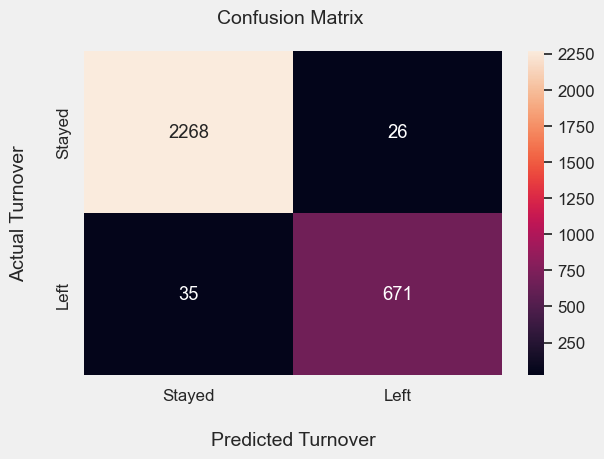

In [241]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# compute the confusion matrix
cm = confusion_matrix(y_test,model.predict(X_test))

# Change figure size and increase dpi for better resolution
plt.figure(figsize=(6,4), dpi=100)
# Scale up the size of all text
sns.set(font_scale = 1.1)

ax = sns.heatmap(cm, annot=True, fmt='d', )

# set x-axis label and ticks. 
ax.set_xlabel("Predicted Turnover", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(['Stayed', 'Left'])

# set y-axis label and ticks
ax.set_ylabel("Actual Turnover", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(['Stayed', 'Left'])

# set plot title
ax.set_title("Confusion Matrix ", fontsize=14, pad=20)

plt.show()

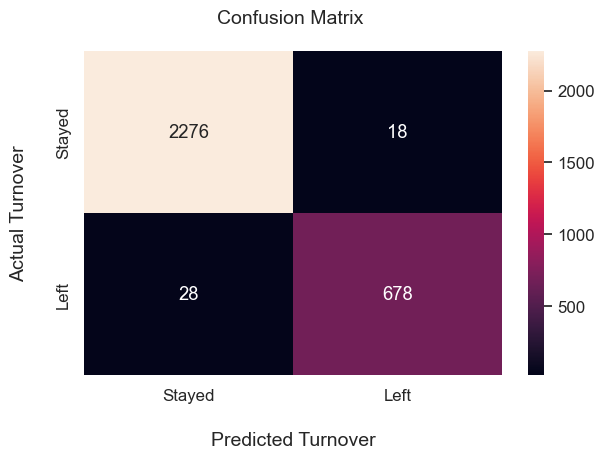

In [242]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# compute the confusion matrix
cm = confusion_matrix(y_test,rf.predict(X_test))

# Change figure size and increase dpi for better resolution
plt.figure(figsize=(6,4), dpi=100)
# Scale up the size of all text
sns.set(font_scale = 1.1)

ax = sns.heatmap(cm, annot=True, fmt='d', )

# set x-axis label and ticks. 
ax.set_xlabel("Predicted Turnover", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(['Stayed', 'Left'])

# set y-axis label and ticks
ax.set_ylabel("Actual Turnover", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(['Stayed', 'Left'])

# set plot title
ax.set_title("Confusion Matrix ", fontsize=14, pad=20)

plt.show()

Looking at the current data, our main focus is to maximize true positives and minimize false negatives. The true negatives and false positives are also important but we want to focus on our true positives and false negatives becuase from a business point of view, they have a larger impact on the decision we make. 

Let's visualize this using:

|          | Predicted Stayed           | Predicted Left  |
| ------------- |------------| -----:|
| **Actual Stayed**      | - | 50 |
| **Actual Left**   | 100 | 25|

For everytime an employee leaves us and we predict that correctly, we lose 25 dollars and if we predict that incorrectly we lose 50 dollars. If we predicted that the employee would have stayed with us and they ended up leaving it costs us 100 dollars. 

Comparing both of the confusion matricies, the LGBM matrix cost us 21,150 dollars and the CF matrix cost us 20,450 dollars. Therefore since our business objective is to minimize cost due to employee turnover, The CF matrix would be the better option. 